In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize

import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   pytest.ini
 BAAD16DATASET			   README.rst
 BACC1.csv			   requirements
 BACC2.csv			   samledata.csv
 bengali_stemmer		   setup.cfg
 bengali-stemmer-dev		   setup.py
 bengali_stemmer.egg-info	   stemmer.ipynb
 bengali_word2vec		   Stopwords.csv
 bengali_word2vec.model		   stopwordsnew.csv
 bn_glove.39M.300d.txt		   tests
 build				   try_w2v.ipynb
 cc.bn.300.vec			   ulm1.csv
'Copy of ulm_train.csv'		   ulm2.csv
 dist				   wbc.ipynb
 LICENSE			   word2vec.ipynb
'naivebias on bangla news.ipynb'  'word2veclast try.ipynb'
'new data.ipynb'


In [ ]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("BACC*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
       class_id                                           sentence
0             1  ১ পৃথিবীতে ঢের দিন বেঁচে থাকে আমাদের আয়ু এখন ম...
1             1  প্রান্তরের পারে তব তিমিরের খেয়া নীরবে যেতেছে দ...
2             1  তোমার চোখের পরে তাহার মুখেরে ভালোবেসে এখানে এস...
3             1  যৌবনের সুরাপাত্র গরল মদির ঢালো নি অধরে তব ধরা ...
4             1  হাজার বছর ধরে আমি পথ হাঁটিতেছি পৃথিবীর পথে সিং...
...         ...                                                ...
27421        18  নূতন এবং খুব কম লোকেই উহা বুঝিতে পারে কিন্তু প...
27422        18  আনিয়াছে এমন কি যে স্পর্শ করিয়াছে তাহার গুণদোষ ...
27423        18  পর্যন্ত পারে না আমরা নিজেদের প্রতি বিশ্বাস হার...
27424        18  ভারতের ইতিহাস পাঠ করিলে জানা যায় ভারত বরাবরই ক...
27425        18  নিকট যে সকল পাশ্চাত্যদেশীয় প্রলোভন আসিয়া থাকে ...

[27426 rows x 2 columns]


In [ ]:
data['class_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [ ]:
data.shape

(27426, 2)

In [ ]:
data.shape
data.dtypes

class_id     int64
sentence    object
dtype: object

In [ ]:
#LE= ['ij', 'fe', 'mk', 'rg', 'rn', 'hm']

In [ ]:
data.isnull().any()

class_id    False
sentence    False
dtype: bool

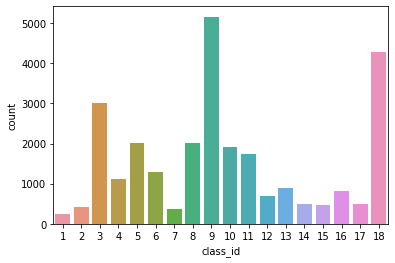

In [ ]:
sns.countplot(data.class_id)

In [ ]:
data['text_length'] = data['sentence'].str.len()
print(data['text_length'])

0        1113
1        2018
2         954
3        2030
4         801
         ... 
27421    1782
27422    1425
27423    1703
27424    1806
27425    1739
Name: text_length, Length: 27426, dtype: int64


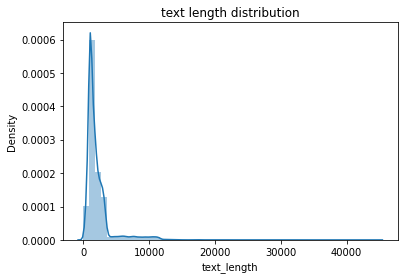

In [ ]:
sns.distplot(data['text_length']).set_title('text length distribution');

In [ ]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

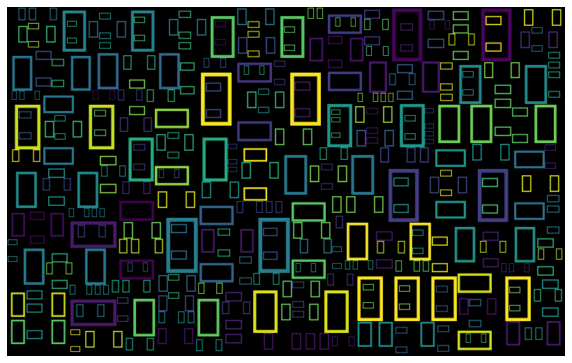

In [ ]:
subset=data[data.class_id==13]
text=subset.sentence.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Feature Engineering
#Removing the special characters
#1) \r
#2) \n

#Removing Punctuations and Stopwords

def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)

    stop_words = pd.read_csv('Stopwords.csv')
    #stop_words = set(stopwords.words('Stopwords.csv'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    return text


data['Text_parsed'] = data['sentence'].apply(process_text)
data.head()

,class_id,sentence,text_length,Text_parsed
0,1,১ পৃথিবীতে ঢের দিন বেঁচে থাকে আমাদের আয়ু এখন ম...,1113,১ পথবত ঢর দন বচ থক আমদর আয় এখন মতযর শবদ শন দনম...
1,1,প্রান্তরের পারে তব তিমিরের খেয়া নীরবে যেতেছে দ...,2018,পরনতরর পর তব তমরর খয় নরব যতছ দল নদল আলয় হথ গহব...
2,1,তোমার চোখের পরে তাহার মুখেরে ভালোবেসে এখানে এস...,954,তমর চখর পর তহর মখর ভলবস এখন এসছ আম আর একবর কপ ...
3,1,যৌবনের সুরাপাত্র গরল মদির ঢালো নি অধরে তব ধরা ...,2030,যবনর সরপতর গরল মদর ঢল ন অধর তব ধর মহনর উরদধফণ ...
4,1,হাজার বছর ধরে আমি পথ হাঁটিতেছি পৃথিবীর পথে সিং...,801,হজর বছর ধর আম পথ হটতছ পথবর পথ সহল সমদর থক নশথর...


In [ ]:
data['sentence'] = data['sentence'].apply(process_text)
data.head()

,class_id,sentence,text_length,Text_parsed
0,1,১ পথবত ঢর দন বচ থক আমদর আয় এখন মতযর শবদ শন দনম...,1113,১ পথবত ঢর দন বচ থক আমদর আয় এখন মতযর শবদ শন দনম...
1,1,পরনতরর পর তব তমরর খয় নরব যতছ দল নদল আলয় হথ গহব...,2018,পরনতরর পর তব তমরর খয় নরব যতছ দল নদল আলয় হথ গহব...
2,1,তমর চখর পর তহর মখর ভলবস এখন এসছ আম আর একবর কপ ...,954,তমর চখর পর তহর মখর ভলবস এখন এসছ আম আর একবর কপ ...
3,1,যবনর সরপতর গরল মদর ঢল ন অধর তব ধর মহনর উরদধফণ ...,2030,যবনর সরপতর গরল মদর ঢল ন অধর তব ধর মহনর উরদধফণ ...
4,1,হজর বছর ধর আম পথ হটতছ পথবর পথ সহল সমদর থক নশথর...,801,হজর বছর ধর আম পথ হটতছ পথবর পথ সহল সমদর থক নশথর...


In [ ]:
X = data['sentence'].values

In [ ]:
#Label Encoding


from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Category_target']= label_encoder.fit_transform(data['class_id'])
#BBC_News.head()


In [ ]:

#Split the data in Training and testing
X_train, X_test, y_train, y_test = train_test_split(data['sentence'],
                                                    data['class_id'],
                                                    test_size=0.2,
                                                    random_state=8)

In [ ]:
X_train.shape

(21940,)

In [ ]:
X_test.shape

(5486,)

In [ ]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.07838807]
 [0.10431091 0.0660248  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.07614942 0.         0.         ... 0.         0.         0.12614576]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(5486, 300)


In [ ]:
#Building Models
#Random Forest


from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8238095238095238
              precision    recall  f1-score   support

          fe       0.84      0.82      0.83        72
          hm       0.84      0.89      0.87        55
          ij       0.84      0.93      0.88        67
          mk       0.78      0.81      0.79        77
          rg       0.87      0.68      0.77        79
          rn       0.79      0.86      0.82        70

    accuracy                           0.82       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.82      0.82       420



In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Hyper Paramater Tuning(Random Forest)

from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1200}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8238095238095238
              precision    recall  f1-score   support

          fe       0.84      0.82      0.83        72
          hm       0.84      0.89      0.87        55
          ij       0.84      0.93      0.88        67
          mk       0.78      0.81      0.79        77
          rg       0.87      0.68      0.77        79
          rn       0.79      0.86      0.82        70

    accuracy                           0.82       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.82      0.82       420



In [ ]:
#svm

smodel = svm . SVC ( C = 3, gamma = 'scale', kernel = 'rbf' )

smodel . fit ( sent_vectors , y_train )

In [ ]:
#Logistic Regression


model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.8785714285714286
              precision    recall  f1-score   support

          fe       0.88      0.85      0.87        72
          hm       0.86      0.93      0.89        55
          ij       0.95      0.93      0.94        67
          mk       0.83      0.88      0.86        77
          rg       0.94      0.82      0.88        79
          rn       0.82      0.89      0.85        70

    accuracy                           0.88       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.88      0.88      0.88       420



In [ ]:
#Hyper Parameter Tuning (Logistic Regression)

param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [ ]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8785714285714286
              precision    recall  f1-score   support

          fe       0.88      0.85      0.87        72
          hm       0.86      0.93      0.89        55
          ij       0.95      0.93      0.94        67
          mk       0.83      0.88      0.86        77
          rg       0.94      0.82      0.88        79
          rn       0.82      0.89      0.85        70

    accuracy                           0.88       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.88      0.88      0.88       420



In [ ]:
#KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7023809523809523
              precision    recall  f1-score   support

          fe       0.66      0.64      0.65        72
          hm       0.56      0.95      0.70        55
          ij       0.75      0.82      0.79        67
          mk       0.65      0.86      0.74        77
          rg       0.90      0.54      0.68        79
          rn       0.97      0.47      0.63        70

    accuracy                           0.70       420
   macro avg       0.75      0.71      0.70       420
weighted avg       0.75      0.70      0.70       420



In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Hyper Paramaters Tuning (KNeighborsClassifier)

from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [ ]:
bestF.best_params_

{'n_neighbors': 7, 'p': 1}

In [ ]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6833333333333333
              precision    recall  f1-score   support

          fe       0.56      0.64      0.60        72
          hm       0.57      0.95      0.71        55
          ij       0.79      0.81      0.80        67
          mk       0.64      0.83      0.72        77
          rg       0.88      0.48      0.62        79
          rn       0.94      0.47      0.63        70

    accuracy                           0.68       420
   macro avg       0.73      0.70      0.68       420
weighted avg       0.74      0.68      0.68       420



In [ ]:
#Decision Tree


model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.5142857142857142
              precision    recall  f1-score   support

          fe       0.49      0.50      0.49        72
          hm       0.57      0.69      0.62        55
          ij       0.58      0.51      0.54        67
          mk       0.58      0.56      0.57        77
          rg       0.46      0.43      0.44        79
          rn       0.43      0.44      0.44        70

    accuracy                           0.51       420
   macro avg       0.52      0.52      0.52       420
weighted avg       0.51      0.51      0.51       420



In [ ]:

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
#Hyper Paramter Tuning (Decision Tree)

import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:

bestF.best_params_


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}

In [ ]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.5166666666666667
              precision    recall  f1-score   support

          fe       0.52      0.57      0.54        72
          hm       0.69      0.73      0.71        55
          ij       0.61      0.63      0.62        67
          mk       0.49      0.40      0.44        77
          rg       0.40      0.47      0.43        79
          rn       0.44      0.37      0.40        70

    accuracy                           0.52       420
   macro avg       0.53      0.53      0.52       420
weighted avg       0.52      0.52      0.51       420



In [ ]:

#GaussianNB

model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7428571428571429
              precision    recall  f1-score   support

          fe       0.75      0.85      0.80        72
          hm       0.85      0.73      0.78        55
          ij       0.63      0.96      0.76        67
          mk       0.75      0.77      0.76        77
          rg       0.84      0.54      0.66        79
          rn       0.74      0.64      0.69        70

    accuracy                           0.74       420
   macro avg       0.76      0.75      0.74       420
weighted avg       0.76      0.74      0.74       420



##Doc2Vec

In [ ]:
X = data['sentence'].values

In [ ]:
Doc = pd.DataFrame()
Doc['sentence'] = data['sentence'].values
Doc['class_id'] = data['Category_target']
Doc.head()

,sentence,class_id
0,১ পৃথিবীতে ঢের দিন বেঁচে থাকে আমাদের আয়ু এখন ম...,0
1,প্রান্তরের পারে তব তিমিরের খেয়া নীরবে যেতেছে দ...,0
2,তোমার চোখের পরে তাহার মুখেরে ভালোবেসে এখানে এস...,0
3,যৌবনের সুরাপাত্র গরল মদির ঢালো নি অধরে তব ধরা ...,0
4,হাজার বছর ধরে আমি পথ হাঁটিতেছি পৃথিবীর পথে সিং...,0


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []


    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))

    return labeled


X_train, X_test, y_train, y_test = train_test_split(Doc.sentence, Doc.class_id, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:

all_data[0:2]

[TaggedDocument(words=['ধর্মপদ', 'আজকের', 'বিষয়', 'আজও', 'যারা', 'জেগে', 'ওঠেনি', 'এই', 'শিশুর', 'সন্ত্রাসবাদী', 'হয়ে', 'ওঠার', 'সম্ভাবনা', 'শূন্য', 'আজও', 'যারা', 'জেগে', 'ওঠেনি', 'সমস্যা', 'তাদের', 'নিয়েই', 'যেভাবে', 'বাঁচার', 'কথা', 'সেভাবে', 'বাঁচেনা', 'মানুষ', 'কী', 'ভাবে', 'বাঁচার', 'কথা', 'সচেতন', 'হয়ে', 'ঘুমিয়ে', 'না', 'থেকে', 'জেগে', 'উঠে', 'কোন্', 'নদীর', 'পাড়ে', 'মৃতা', 'মায়ের', 'পাশে', 'দুধ', 'খেতে', 'না', 'পেরে', 'শিশু', 'কাঁদল', 'খবরটা', 'কেউ', 'খেয়াল', 'করল', 'কেউবা', 'করল', 'না', 'একদল', 'ছুটল', 'যারা', 'ছুটল', 'তারাই', 'জাগ্রত', 'সচেতন', 'সচেতন', 'ও', 'সিংহহৃদয়', 'সেই', 'প্রাচীনকাল', 'থেকেই', 'এরকম', 'সিংহহৃদয়ের', 'জন্য', 'প্রার্থনা', 'করা', 'হয়েছে', 'বারবার', 'প্রার্থনা', 'করা', 'হয়েছে', 'যারা', 'এখনও', 'জেগে', 'ওঠেনি', 'তারা', 'যেন', 'জেগে', 'ওঠে', 'আজ', 'অনুবাদ', 'টমাস', 'বাইরোম'], tags=['Train_0']),
 TaggedDocument(words=['মোটরে', 'যাইতে', 'যাইতে', 'শকুন্তলার', 'শয়নকক্ষের', 'দৃশ্যটাই', 'চোখের', 'সামনে', 'ভাসিতে', 'লাগিল', 'মনে', 'হইল', 'যেন', 'একটি', 'মর্মস্পশী', '

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 27426/27426 [00:00<00:00, 1413754.73it/s]


In [ ]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
#SVM

from sklearn.svm import SVC
model = SVC()

model= model.fit(train_vectors_dbow, y_train)
model_prediction= model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9953816237238697
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        69
           1       0.99      1.00      0.99       132
           2       1.00      1.00      1.00       895
           3       1.00      1.00      1.00       315
           4       1.00      1.00      1.00       596
           5       0.98      1.00      0.99       405
           6       1.00      0.94      0.97       109
           7       1.00      1.00      1.00       590
           8       1.00      1.00      1.00      1550
           9       1.00      1.00      1.00       590
          10       1.00      1.00      1.00       534
          11       1.00      1.00      1.00       213
          12       0.99      0.99      0.99       263
          13       0.99      0.97      0.98       141
          14       0.92      0.96      0.94       122
          15       1.00      1.00      1.00       267
          16       1.00      0.98      0.99       156

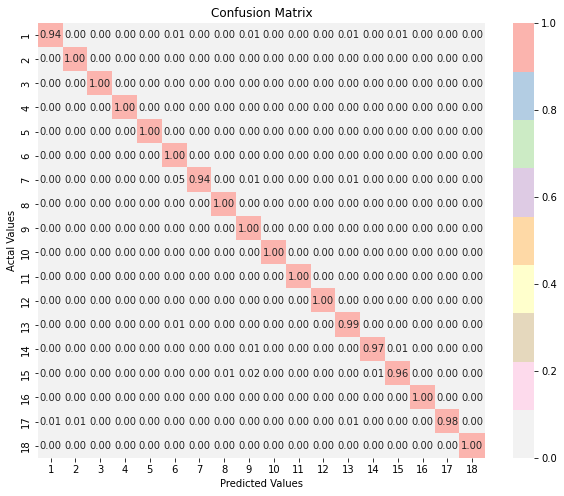

In [ ]:
# SVM Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'],

                     columns = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True,
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:

#Logistic Regression
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9914924647544968
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        69
           1       0.98      0.99      0.99       132
           2       1.00      1.00      1.00       895
           3       1.00      0.99      1.00       315
           4       1.00      1.00      1.00       596
           5       0.99      0.99      0.99       405
           6       0.98      0.95      0.97       109
           7       1.00      1.00      1.00       590
           8       0.99      0.99      0.99      1550
           9       1.00      0.99      1.00       590
          10       1.00      0.99      1.00       534
          11       1.00      1.00      1.00       213
          12       0.95      0.97      0.96       263
          13       0.95      0.96      0.96       141
          14       0.91      0.90      0.91       122
          15       0.99      1.00      0.99       267
          16       0.99      0.99      0.99       156

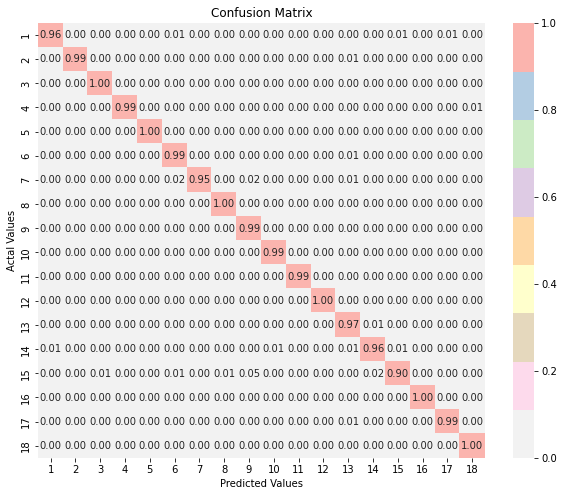

In [ ]:
# LR Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'],

                     columns = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True,
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:

model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9720466699076324
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.98      0.93      0.95       132
           2       0.99      0.98      0.99       895
           3       0.93      1.00      0.96       315
           4       1.00      0.99      0.99       596
           5       0.89      1.00      0.94       405
           6       0.99      0.91      0.95       109
           7       0.99      1.00      0.99       590
           8       0.99      0.95      0.97      1550
           9       0.99      0.97      0.98       590
          10       0.98      0.97      0.98       534
          11       1.00      1.00      1.00       213
          12       0.96      0.84      0.90       263
          13       0.95      0.94      0.94       141
          14       0.72      0.97      0.83       122
          15       0.99      0.99      0.99       267
          16       0.99      0.94      0.97       156

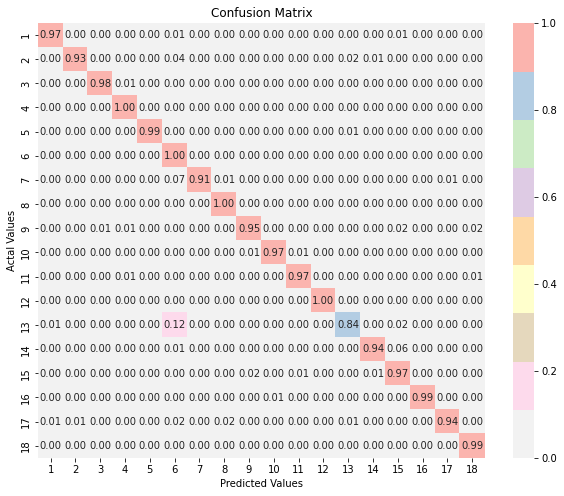

In [ ]:
# naIVE BAYES Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'],

                     columns = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True,
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6871657754010695
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        69
           1       1.00      0.04      0.07       132
           2       0.77      0.85      0.81       895
           3       0.93      0.20      0.33       315
           4       0.83      0.85      0.84       596
           5       0.90      0.70      0.79       405
           6       1.00      0.07      0.14       109
           7       0.79      0.84      0.81       590
           8       0.52      0.96      0.67      1550
           9       0.84      0.73      0.78       590
          10       0.93      0.41      0.57       534
          11       1.00      0.38      0.55       213
          12       0.96      0.10      0.17       263
          13       1.00      0.01      0.01       141
          14       1.00      0.01      0.02       122
          15       0.98      0.21      0.35       267
          16       1.00      0.01      0.01       156

In [ ]:

#Hyper Parameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

In [ ]:
bestF.best_params_

In [ ]:

model = RandomForestClassifier(max_depth=15,min_samples_leaf=3,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.7074623237724842
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        69
           1       1.00      0.02      0.04       132
           2       0.88      0.90      0.89       895
           3       1.00      0.14      0.25       315
           4       0.92      0.90      0.91       596
           5       0.94      0.75      0.84       405
           6       1.00      0.02      0.04       109
           7       0.85      0.86      0.86       590
           8       0.50      0.99      0.66      1550
           9       0.91      0.81      0.86       590
          10       1.00      0.43      0.60       534
          11       1.00      0.29      0.45       213
          12       1.00      0.07      0.13       263
          13       0.00      0.00      0.00       141
          14       1.00      0.01      0.02       122
          15       1.00      0.15      0.26       267
          16       0.00      0.00      0.00       156

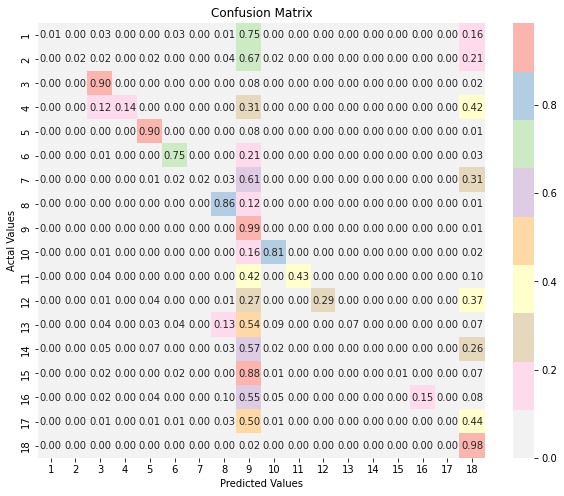

In [ ]:
# R Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'],

                     columns = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True,
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Decision Tree
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.3102819640252795
              precision    recall  f1-score   support

           0       0.03      0.03      0.03        69
           1       0.05      0.05      0.05       132
           2       0.35      0.37      0.36       895
           3       0.18      0.19      0.19       315
           4       0.27      0.27      0.27       596
           5       0.38      0.34      0.35       405
           6       0.08      0.09      0.09       109
           7       0.34      0.37      0.36       590
           8       0.44      0.45      0.44      1550
           9       0.24      0.24      0.24       590
          10       0.22      0.21      0.22       534
          11       0.21      0.18      0.20       213
          12       0.12      0.12      0.12       263
          13       0.12      0.11      0.11       141
          14       0.07      0.10      0.08       122
          15       0.14      0.13      0.13       267
          16       0.05      0.05      0.05       156

In [ ]:
#Hyper Parameter Tuning (Decision Tree)
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6}

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=6)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.32255712202236264
              precision    recall  f1-score   support

           0       0.05      0.06      0.06        69
           1       0.09      0.08      0.09       132
           2       0.36      0.40      0.38       895
           3       0.20      0.21      0.20       315
           4       0.24      0.28      0.26       596
           5       0.36      0.35      0.36       405
           6       0.16      0.15      0.15       109
           7       0.39      0.42      0.40       590
           8       0.39      0.43      0.41      1550
           9       0.27      0.25      0.26       590
          10       0.26      0.24      0.25       534
          11       0.34      0.38      0.36       213
          12       0.14      0.12      0.13       263
          13       0.10      0.06      0.08       141
          14       0.04      0.04      0.04       122
          15       0.23      0.16      0.19       267
          16       0.14      0.08      0.11       15

In [ ]:
#KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6113271754982985
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        69
           1       0.53      0.77      0.63       132
           2       0.97      0.25      0.40       895
           3       0.39      0.69      0.50       315
           4       0.70      0.95      0.80       596
           5       0.99      0.30      0.47       405
           6       1.00      0.84      0.92       109
           7       0.34      0.98      0.51       590
           8       0.61      0.57      0.59      1550
           9       0.76      0.94      0.84       590
          10       0.97      0.92      0.95       534
          11       1.00      0.94      0.97       213
          12       0.33      0.85      0.47       263
          13       1.00      0.66      0.79       141
          14       0.66      0.50      0.57       122
          15       0.62      0.97      0.76       267
          16       1.00      0.20      0.33       156

In [ ]:
#Hyper Parameter Tuning (KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [ ]:
bestF.best_params_

{'n_neighbors': 7, 'p': 5}

In [ ]:
model = KNeighborsClassifier(n_neighbors=5,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6113271754982985
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        69
           1       0.53      0.77      0.63       132
           2       0.97      0.25      0.40       895
           3       0.39      0.69      0.50       315
           4       0.70      0.95      0.80       596
           5       0.99      0.30      0.47       405
           6       1.00      0.84      0.92       109
           7       0.34      0.98      0.51       590
           8       0.61      0.57      0.59      1550
           9       0.76      0.94      0.84       590
          10       0.97      0.92      0.95       534
          11       1.00      0.94      0.97       213
          12       0.33      0.85      0.47       263
          13       1.00      0.66      0.79       141
          14       0.66      0.50      0.57       122
          15       0.62      0.97      0.76       267
          16       1.00      0.20      0.33       156

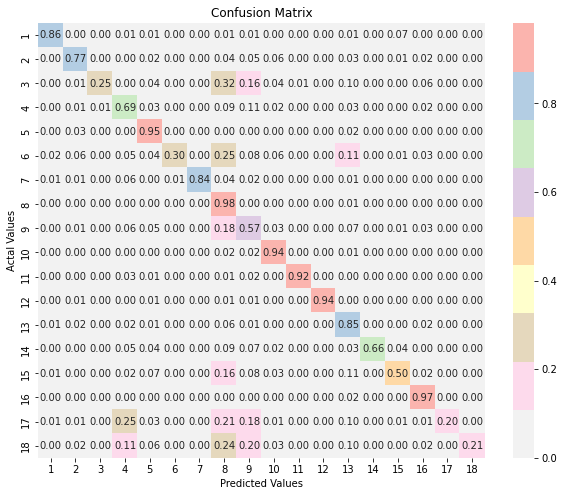

In [ ]:

# R Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'],

                     columns = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True,
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()